/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


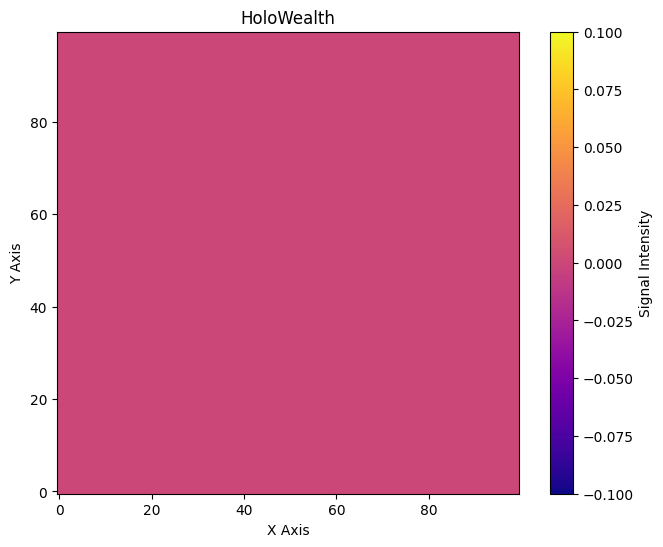

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

waveform_size = 100
frequency = 0.5
amplitude = 5.0
direction_angle = np.pi / 4
total_time_hours = 24
time_steps = 240

time_interval = total_time_hours / time_steps

x = torch.linspace(-waveform_size // 2, waveform_size // 2, waveform_size)
y = torch.linspace(-waveform_size // 2, waveform_size // 2, waveform_size)
X, Y = torch.meshgrid(x, y)

def infinite_waveform(t):
  return amplitude * torch.cos(2 * np.pi * frequency * (X * torch.cos(direction) + Y * torch.sin(direction_angle)) + 2 * np.pi * t)

wealth_data = torch.rand(waveform_size, waveform_size) * 100
total_wealth_energy = wealth_data ** 2

noise_mask = torch.randn(waveform_size, waveform_size) * 0.1
protected_wealth_energy = total_wealth_energy + noise_mask

wealth_energy_per_time = protected_wealth_energy / time_steps

fig, ax = plt.subplots(figsize=(8, 6))
signal_plot = ax.imshow(torch.zeros(waveform_size, waveform_size).numpy(), cmap='plasma', origin='lower')
plt.colorbar(signal_plot, ax=ax, label='Signal Intensity')
ax.set_title("HoloWealth")
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

def update(t):
  wave = infinite_waveform(t * time_interval)
  combined_signal = wave * wealth_energy_per_time
  signal_plot.set_data(combined_signal.numpy())
  ax.set_title(f"Signal at Time Step: {t}/{time_steps}")

ani = FuncAnimation(fig, update, frames=time_steps, interval=100, repeat=False)

plt.show()